#### Credit Card Fraud Detection
Cred card fraud can result in a significant financial loss, Fraud detection systems use various algorithms and techniques to detect fraudulent transactions and prevent them from being processed, protecting consumers and financial institutions from financial losses.

In this project, we address the problem of detecting credit card fraud using libraries such as NumPy, Scikit-learn, and a few other Python tools.
We create a binary classifier and evaluate it with various machine learning models to identify which one provides better predictions.

#### The dataset
The dataset contains transactions made by credit cards in September 2013 by European card holders.
The dataset contains transactions that occurred over a two-day period, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class(frauds) represent 0.172% of all transactions.

FeaturesV1, V2,..., V28 are the principal components obtained with PCA transformation (Principal Components Analysis transformation), the only features that have not been transformed with PCA are 'Time'and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transection in the dataset. Feature 'Amount' represents the transaction value and can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud anf 0 otherwise.

The dataset can be downloaded from [[https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download]]

#### First, we import the necessary modules

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as time

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
classification_report, precision_score, recall_score, f1_score)

#### Next, we will describe the steps used to build the classifier.

#### Step 1. Perform Exploratoty Data Analyses (EDA)
As mensioned before there are 284,807 transactions, and only 492 transactions being fraud. Let's load the dataset and perform EAD.

In [133]:
dataset = pd.read_csv("./data/creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's check for any missing values and confirm the class imbalance as mentioned on the desciption of the dataset.

No missing values found in the dataset.
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


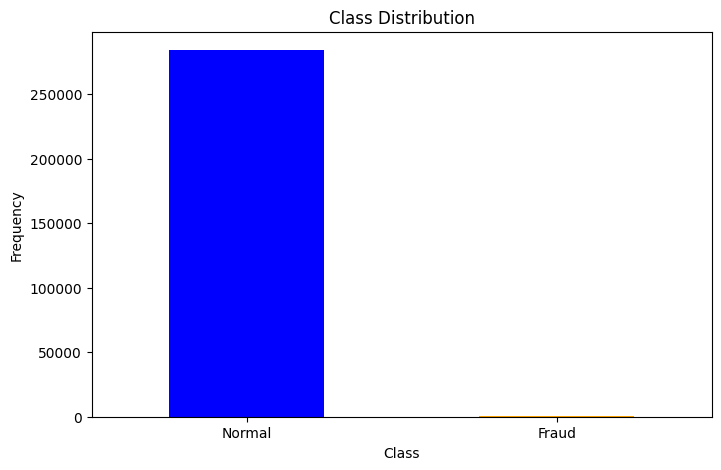

In [134]:
# Check for missing values
if dataset.isnull().values.any():
    print("Dataset contains missing values. Please handle them before proceeding.")
else:
    print("No missing values found in the dataset.")
# Check for class imbalance
print("Class distribution:\n", dataset['Class'].value_counts())

# Plotting the class distribution
plt.figure(figsize=(8, 5))
dataset['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Fraud'], rotation=0)
plt.show()

The feature we are instersted is the 'Amount'. Let's have a look on the statistical information of this feature.

In [135]:
print("Non-Fraud (Class=0) Amount Statistics:")
print(dataset[dataset['Class'] == 0]['Amount'].describe())

print("\nFraud (Class=1) Amount Statistics:")
print(dataset[dataset['Class'] == 1]['Amount'].describe())

Non-Fraud (Class=0) Amount Statistics:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraud (Class=1) Amount Statistics:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Now that we have examined the structure of the dataset, it is time to prepare it for use with machine learning models. First, we will split the dataset and then address the class imbalance issue.


In [136]:
y = dataset['Class']
X = dataset.drop(['Class'], axis=1)
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#  Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


Let's verify that SMOTE has successfully balanced the class distribution, you can compare the class counts before and after applying SMOTE. The desired result is a equal samples. 

In [137]:
# Original class distribution
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

# Class distribution after SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_train_res).value_counts())

Before SMOTE:
Class
0    199020
1       344
Name: count, dtype: int64

After SMOTE:
Class
0    199020
1    199020
Name: count, dtype: int64


### Step 2. Train the model
Now that we have our datasert prepared we can fit our models. We are going to compare three models and avaluate which one permed better on the dataset. The models to be acalued are:
- Logistic Regression
- Random Forest
- Suppot Vector Machine (SVM)

##### 1. Logistic Regression 
Logistic Regression, is a *Supervised Machine Learning Algortithm* used for classification. It estimate the probability that a data point belongs to a cetain class, using a sigmoid function to compress
the output of a linear equation into a value 0 and 1.
$$
P(y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n)}}
$$

Where:

- \( X_1, X_2, \ldots, X_n \) are the input features  
- \( \beta_0 \) is the intercept (bias term)  
- \( \beta_1, \beta_2, \ldots, \beta_n \) are the model coefficients  
- The output is a probability between 0 and 1
 
##### 2. Random Forest
Random forest is an ensemble learning algorithm ised for classification and regretion tasks. It creates multiples decison trees and combaines their output to improve prediction accurancy and control 
overfiting. For classification, it uses majority votes, following we have some highlights:
- **Handles Missing Data**: It can work even if some data is missing so you don't  always need to fill in the gaps yourself.
- **Shows Feature Importance**: It tells you which feature (columns) are most useful for making predictions which helps you understand you data better.
- **Works Well with Big and Complex Data**: It can handle large dataset with many features without slowing down or losing accuracy.
- **Used for Different Task**: You can use it for both classification like predicting types or labels and regression like predicting numbers or amounts.

We are going to notice that Radon Forest is also computationally expensive. 

##### 3. Support Vector Machine 
Support Vector Machine (SVM) is a supervised learning algorithm used for classification (and also regression).It aims to find the optimal hyperplane that best separates data points of different classes.

We are usining "from sklearn.svm import LinearSVC" which provides:
- Finds a straight-line decision boundary (a hyperplane in higher dimensions)
- Maximizes the margin — the distance between the hyperplane and the nearest data points from each class (called support vectors)
- Supports soft margins to allow some misclassification when data isn't perfectly linearly separable (controlled by the C parameter)


In [138]:
# define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),
    'Support Vector Machine': LinearSVC(max_iter=5000, class_weight='balanced')  
}

In [139]:
# Running the models and evaluating their performance
# this cell may take a while to run depending on the dataset size and model complexity

# Initialize a list to store metrics
metrics = []

for model_name, model in models.items():
    print(f"Model: {model_name}")
    start_time = time.time()
    model.fit(X_train_res, y_train_res)
    end_time = time.time()
    training_time = round(time.time() - start_time, 2)
    print(f"Training time for {model_name}: {training_time:.2f} seconds\n")
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    
    # save the metrics
    model_metrics  = {
        'model_name': model_name,
        'training_time': training_time,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1-score': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
    }

    # Append to list
    metrics.append(model_metrics)

    # Evaluate the model
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\n" + "="*50 + "\n")

Model: Logistic Regression
Training time for Logistic Regression: 2.55 seconds

Model: Logistic Regression
Accuracy: 0.9777278419531149
Confusion Matrix:
 [[83410  1885]
 [   18   130]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Precision: 0.06451612903225806
Recall: 0.8783783783783784
F1 Score: 0.12020342117429496


Model: Random Forest
Training time for Random Forest: 180.57 seconds

Model: Random Forest
Accuracy: 0.9993914071369217
Confusion Matrix:
 [[85277    18]
 [   34   114]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.77      0.81       148

    accuracy   

#### Step 3. Evaluate the rersults
Is clear that Random Forest provides better results of compared with the other model. Let's analyze the results report and clarify the meaning of the metrics. 

Starting for the metric 'accuracy'. Let's have a plot with the accuracy of each model.

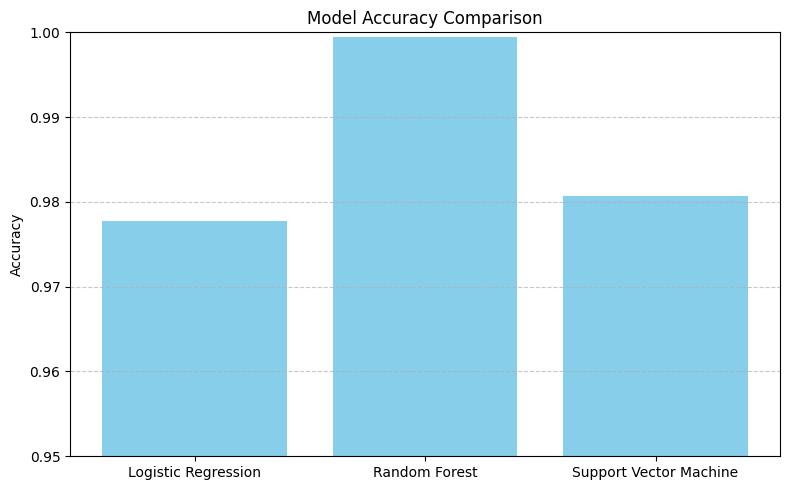

In [140]:
# Extract labels and accuracies
labels = [m['model_name'] for m in metrics]
accuracy = [m['accuracy'] for m in metrics]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.95, 1.0)  # Zoom in for better comparison (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The plot shows that Random Forest achieves higher accuracy than the other two models. 
**Accuracy** is metric we use to evaluate the perfomancy of a classification model. It provides the percentege of correct predictions made by the model.

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Where:

    TP: True Positives (correctly predicted positives)

    TN: True Negatives (correctly predicted negatives)

    FP: False Positives (incorrectly predicted as positive)

    FN: False Negatives (incorrectly predicted as negative)

We still cannot ensure that Random Forest is the best option among our models. Our dataset is an imbalanced model, where the class 1 (fraud) represents less than 1% if the model predicts the class 0 (non-fraud) the model will also have 99% accurancy. Let's keep analysing the others metrics.

In [114]:
# Extract model names and flattened confusion matrices
labels = [m['model_name'] for m in metrics]
confusion_values = [m['confusion_matrix'].ravel() for m in metrics]

# Create a DataFrame
conf_matrix_df = pd.DataFrame(confusion_values, index=labels, columns=['True Negative', 'False Positive', 'False Negative', 'True Positive'])

# Print the result
print("\n🔍 Confusion Matrix for Each Model:\n")
print(conf_matrix_df)



🔍 Confusion Matrix for Each Model:

                        True Negative  False Positive  False Negative  \
Logistic Regression             83410            1885              18   
Random Forest                   85278              17              32   
Support Vector Machine          83666            1629              19   

                        True Positive  
Logistic Regression               130  
Random Forest                     116  
Support Vector Machine            129  


Following is the definistion of the metrics we just have printed:
 - **True Positive(TP)** : Fraud transaction correctly predicted as fraud, our goal is maximize this metric.
 - **False Negative(FN)** : Fraud trasection incorrect predicted as non-fraud.  In real life this is dangerous.
 - **False Positive(FP)** : Non-Fraud transaction incorrectly predicted as fraud.
 - **True Negative(TN)** : Non-fraud transaction correctly predicted as non-fraud.

After the definition we can ensure that the **True Positive** and **False Negative** are the metrics that matters most in our application.

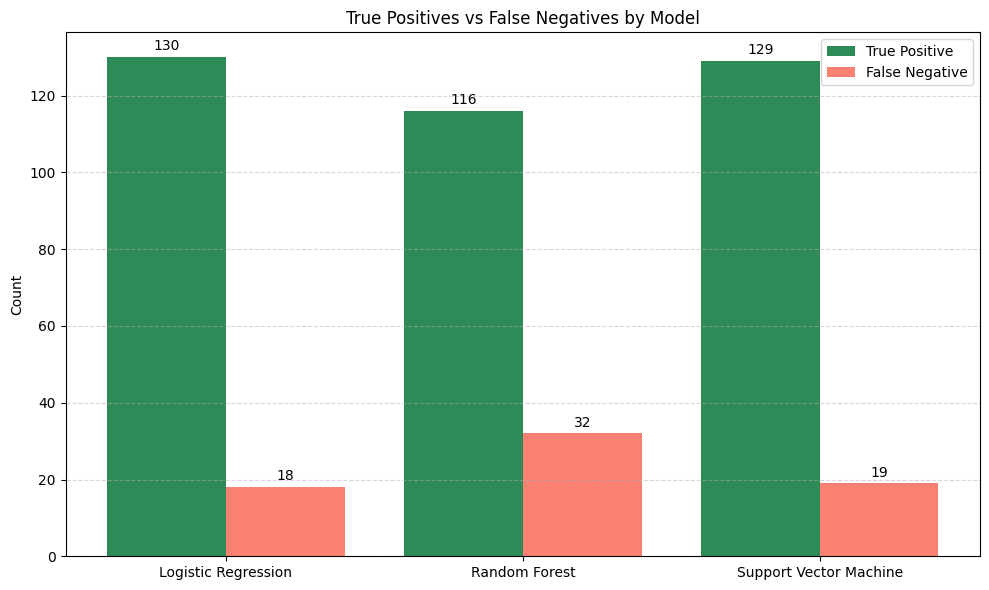

In [142]:
# Extract the key values
labels = conf_matrix_df.index
tp = conf_matrix_df['True Positive']
fn = conf_matrix_df['False Negative']

# Plot
x = range(len(labels))
plt.figure(figsize=(10, 6))
bar1 = plt.bar(x, tp, width=0.4, label='True Positive', color='seagreen', align='center')
bar2 = plt.bar([i + 0.4 for i in x], fn, width=0.4, label='False Negative', color='salmon', align='center')

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Count")
plt.title("True Positives vs False Negatives by Model")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{int(yval)}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

After analizing ther plot, if we take only those meassures to evaluate the models, Random Forest would be the worst model if compared with the other models. Let's sumaryze the information extracted from confusion matrix.
- **Logistic Regression** : Worst Presicion, the model shows very high FP(1885), but in the other hand is the onthe that catches more frauds and it has fewrs FN.
- **Random Forest** : Lower TP and more FN among our models
- **SVM** : THe number are very close of Logistic Regression.

Let's keep analysing the metrics from our report.

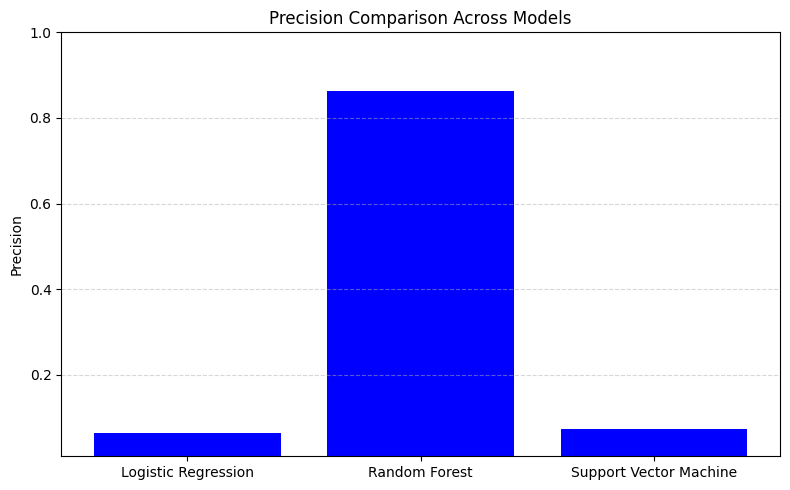

In [143]:
# Extract model names and precision scores
labels = [m['model_name'] for m in metrics]
precision_scores = [m['precision'] for m in metrics]

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(labels, precision_scores, color='blue')
plt.ylabel("Precision")
plt.title("Precision Comparison Across Models")
plt.ylim(0.01, 1.0)  # Zoom in for better comparison (optional)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Random Forest provides far better precision among our models. Precision is a meassure of how many of the predicted cases are actually correct. There is another very impotant metric, *recall* measures the ability of the model to find all the positive cases. We also can call *sensitivity*. Let's have a plot where we can visualize and compare the *recall* and the *precision* of the models.

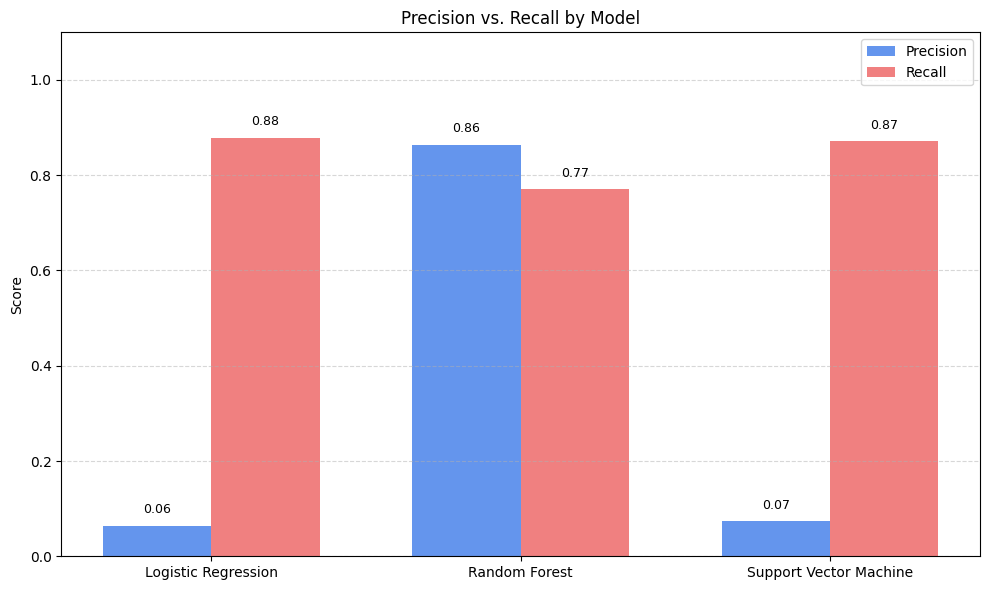

In [144]:
# Extract data
labels = [m['model_name'] for m in metrics]
precisions = [m['precision'] for m in metrics]
recalls = [m['recall'] for m in metrics]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, precisions, width, label='Precision', color='cornflowerblue')
bars2 = ax.bar(x + width/2, recalls, width, label='Recall', color='lightcoral')

# Add labels and title
ax.set_ylabel('Score')
ax.set_title('Precision vs. Recall by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Now we can see difference between models, and notice that **Random Forest** is well balanced, it catchees most frouds but avoid false alarms. **Logistic Regression** is the model with better recall, which means it detects most frauds but it has also the lowest precision (high false positives).
There is one more metric the is going to help us in our medel evaluatioin, this **F1-score**. 

$$
\text{F1-score} = 2 * \frac{\text{Precision x Recall}}{\text{Preecision + Recall}}
$$

F1-score is the harmonic mean of Precision and Recall. It is high only when both *precision* and *recall* are high, with that been said we can conclud that it is a useful measure for imbalance classififcation task. Which is exactly our case on this project.


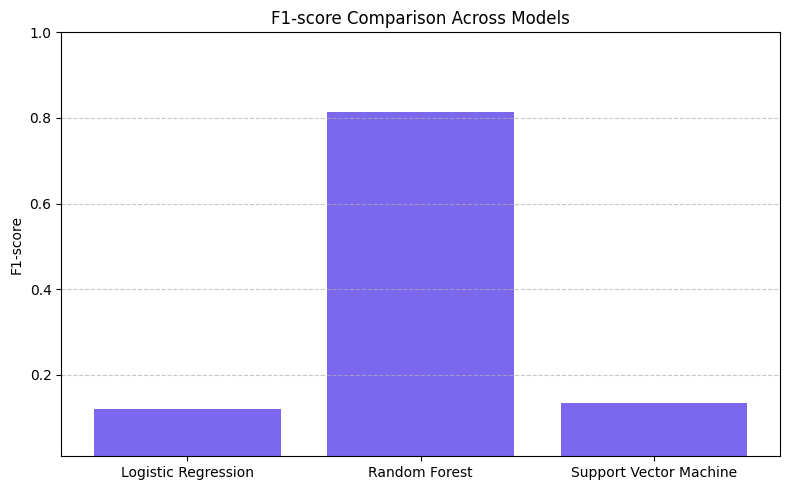

In [145]:
# Extract labels and accuracies
labels = [m['model_name'] for m in metrics]
f1_scores = [m['f1-score'] for m in metrics]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, f1_scores, color='mediumslateblue')
plt.ylabel('F1-score')
plt.title('F1-score Comparison Across Models')
plt.ylim(0.01, 1.0)  # Zoom in for better comparison (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Conclusion
After compare the metrics fo each model we can now easly choose which model is more apropriate to our application based in our goal.
If our goal is is catching fraud and tolarate false positives for further review, Logistic Regretion or SVM woud be a good option with hihgh recall, but low preciion. But if our goal is strong balanced model that catches most frauds but also avoid false alarms, **Random Forest**  is the best option.
